In [24]:
import pandas as pd
import matplotlib.pyplot as mltp
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import sklearn as sk
import seaborn as sea
import re 
from tqdm import tqdm
# from tqdm.notebook import tqdm
# tqdm.pandas()



Latent Dirichlet Allocation (LDA) is a popular algorithm for topic modeling, which is a technique for identifying the underlying themes or topics in a collection of text documents. LDA is a generative probabilistic model that assumes each document is a mixture of a fixed number of topics, and each word in the document is drawn from one of the topics.

The goal of LDA is to infer the topics that generated the words in each document, and to estimate the distribution of words across the topics. This allows LDA to automatically discover the topics present in a collection of documents and to represent each document as a mixture of these topics.

LDA can be used in a variety of applications, such as automatically organizing large collections of documents by topic, identifying the main themes in a corpus of text, or recommending articles similar to a given article. LDA is also often used as a preprocessing step for downstream natural language processing tasks such as text classification or information extraction.

To use LDA, you need to specify the number of topics in the model and fit the model to the documents. The LDA model will then learn the distribution of words across the topics and the distribution of topics for each document. You can then use the model to predict the topics for new documents, or to explore the learned topics and the words associated with each topic.

atent Dirichlet Allocation (LDA) is a generative probabilistic model that assumes each document is a mixture of a fixed number of topics, and each word in the document is drawn from one of the topics. The goal of LDA is to infer the topics that generated the words in each document, and to estimate the distribution of words across the topics.

To do this, LDA uses Bayesian inference, which is a method for estimating the unknown parameters of a probabilistic model based on observed data. In the case of LDA, the model parameters are the topic distributions for each document and the word distributions for each topic.

Here is a high-level overview of how LDA functions:

1. First, LDA assumes that each document is a mixture of a fixed number of topics, and that each word in the document is generated by one of the topics. This means that for each document, there is a probability distribution over the topics, and for each topic, there is a probability distribution over the words.

2. Given a collection of documents, LDA uses Bayesian inference to infer the topic distributions for each document and the word distributions for each topic. This is done by iteratively sampling the topic assignments for each word in each document, and then estimating the topic distributions and word distributions based on the sampled topic assignments.

3. Once the topic distributions and word distributions have been inferred, LDA can be used to predict the topics for new documents. This is done by computing the posterior distribution over the topics given the words in the new document, and then selecting the most likely topics.

4. LDA can also be used to explore the learned topics and the words associated with each topic. This is done by examining the inferred topic distributions and word distributions and identifying the words with the highest probabilities for each topic.

Overall, LDA is a powerful tool for automatically discovering the underlying themes or topics in a collection of text documents. It can be used in a variety of applications, and is often used as a preprocessing step for downstream natural language processing tasks.

Latent Dirichlet Allocation (LDA) ist ein generatives probabilistisches Modell, das davon ausgeht, dass jedes Dokument eine Mischung aus einer festen Anzahl von Themen ist und jedes Wort im Dokument aus einem der Themen stammt. Das Ziel von LDA ist es, die Themen zu ermitteln, die die Wörter in jedem Dokument erzeugt haben, und die Verteilung der Wörter über die Themen zu schätzen.

Um dies zu tun, verwendet LDA Bayes-Schätzung, die eine Methode zur Schätzung der unbekannten Parameter eines probabilistischen Modells anhand beobachteter Daten ist. Im Falle von LDA sind die Modellparameter die Themenverteilungen für jedes Dokument und die Wortverteilungen für jedes Thema.

Hier ist ein Überblick über die Funktionsweise von LDA:

Zunächst geht LDA davon aus, dass jedes Dokument eine Mischung aus einer festen Anzahl von Themen ist und dass jedes Wort im Dokument von einem der Themen erzeugt wird. Das bedeutet, dass es für jedes Dokument eine Wahrscheinlichkeitsverteilung über die Themen gibt und für jedes Thema eine Wahrscheinlichkeitsverteilung über die Wörter.

Angenommen, es gibt eine Sammlung von Dokumenten, verwendet LDA Bayes-Schätzung, um die Themenverteilungen für jedes Dokument und die Wortverteilungen für jedes Thema zu schätzen. Dies wird dadurch erreicht, dass die Themenzuordnungen für jedes Wort in jedem Dokument iterativ gesampelt werden und anschließend die Themenverteilungen und Wortverteilungen anhand der gesampelten Themenzuordnungen geschätzt werden.

Sobald die Themenverteilungen und Wortverteilungen geschätzt wurden, kann LDA verwendet werden, um die Themen für neue Dokumente vorherzusagen. Dies geschieht, indem die posterior Verteilung über die Themen gegebenen die Wörter im neuen Dokument berechnet wird und anschließend die wahrscheinlichsten Themen ausgewählt werden.

LDA kann auch verwendet werden, um die gelernten Themen und die mit jedem Thema verbundenen Wörter zu erkunden. Dies geschieht, indem die geschätzten Themenverte

In [13]:
def stripping(liste):
    return [i.strip() for i in liste]

In [14]:
df=pd.read_csv('data/train_500.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize_without_stopwords': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'word_tokenize_without_stopwords_port': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'msg_lemmatized': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
})

df['word_tokenize']=df['word_tokenize'].progress_apply(stripping)
df['sent_tokenize']=df['sent_tokenize'].progress_apply(stripping)
df['word_tokenize_without_stopwords']=df['word_tokenize_without_stopwords'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

In [15]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.reset_index(drop=True)

In [37]:
df.columns

Index(['id', 'date', 'text', 'lang', 'language_2', 'word_tokenize',
       'sent_tokenize', 'count_word', 'count_sent',
       'word_tokenize_num_of_stopwords', 'word_tokenize_without_stopwords',
       'word_tokenize_without_stopwords_port', 'msg_lemmatized', 'cleanLinks',
       'laenge_saetze', 'word_per_sent_mean', 'gender', 'age', 'topic',
       'sign'],
      dtype='object')

In [38]:
print(f'Rows in the df: {len(df.index)}')

Rows in the df: 19500


In [39]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word)
        
         for word in text if word ]
    return lemm_text
df['msg_lemmatized_port']=df['word_tokenize_without_stopwords_port'].apply(lambda x:lemmatizer(x))

- lgrams 
- ngrams 
- sehen wie oft wörter vorkommen 
- sehen welche tokens überall vorkommen in mehreren oder nur in einem drin sind 
- sehen welche dokumente zugeordnet ist und wie  die verteilung ist der uhrsprünglichen topics 
- tendenzen herrausfinden 
- labeling nicht so gut oder topic modelling 
- zu viel topics oder stopwords 
- frequenzen finden -_> idf --> weiviele wörter in den dokumenten vorkommen 
- statistiken der wörter --> basierend auf ngrams 
- edge case nicht beschneiden --> schwellwerte --> explorativ 
- 

In [40]:
df.head()

id            date                                               text  \
0  2970791     25,May,2004  This blog is being posted due to the fact that...   
1  3931851  02,agosto,2004  So I have a big fucking interview tomorrow for...   
2  3481650    07,July,2004  I was reminded just now of the time Ashley and...   
3  4187211  20,August,2004  I was checking up on my cousin Dylan and Fanni...   
4  3686696    24,June,2004  for the NME interview click urlLink part 1 and...   

  lang language_2                                      word_tokenize  \
0   en         en  [This, blog, is, being, posted, due, to, the, ...   
1   en         en  [So, I, have, a, big, fucking, interview, tomo...   
2   en         en  [I, was, reminded, just, now, of, the, time, A...   
3   en         en  [I, was, checking, up, on, my, cousin, Dylan, ...   
4   en         en  [for, the, NME, interview, click, urlLink, par...   

                                       sent_tokenize  count_word  count_sent  \
0  [This blog is being posted due to the fact tha...          83           4   
1  [So I have a big fucking interview tomorrow fo...          88           5   
2  [I was reminded just now of the time Ashley an...         574          32   
3  ["I was checking up on my cousin Dylan and Fan...          84           3   
4  [for the NME interview click urlLink part 1 an...          12           1   

   word_tokenize_num_of_stopwords  ...  \
0                              34  ...   
1                              31  ...   
2                             234  ...   
3                              32  ...   
4                               3  ...   

                word_tokenize_without_stopwords_port  \
0  [thi, blog, post, due, fact, littl, develop, h...   
1  [so, i, big, fuck, interview, tomorrow, new, s...   
2  [i, remind, time, ashley, i, drove, kemah, win...   
3  [i, check, cousin, dylan, fanni, "s", wed, sit...   
4  [nme, interview, click, urllink, part, 1, urll...   

                                      msg_lemmatized  \
0  [This,  blog,  posted,  due,  fact,  little,  ...   
1  [So,  I,  big,  fucking,  interview,  tomorrow...   
2  [I,  reminded,  time,  Ashley,  I,  drove,  Ke...   
3  [I,  checking,  cousin,  Dylan,  Fannie,  "s",...   
4  [NME,  interview,  click,  urlLink,  part,  1,...   

                                          cleanLinks laenge_saetze  \
0  This blog is being posted due to the fact that...             4   
1  So I have a big fucking interview tomorrow for...             5   
2  I was reminded just now of the time Ashley and...            32   
3  I was checking up on my cousin Dylan and Fanni...             3   
4  for the NME interview click urlLink part 1 and...             1   

   word_per_sent_mean  gender age    topic         sign  \
0               20.75    male  14  Student  Sagittarius   
1               17.60    male  15  Student       Pisces   
2               17.94  female  17  Student       Gemini   
3               28.00  female  23  Student       Taurus   
4               12.00  female  23  Student     Aquarius   

                                 msg_lemmatized_port  
0  [thi, blog, post, due, fact, littl, develop, h...  
1  [so, i, big, fuck, interview, tomorrow, new, s...  
2  [i, remind, time, ashley, i, drove, kemah, win...  
3  [i, check, cousin, dylan, fanni, "s", wed, sit...  
4  [nme, interview, click, urllink, part, 1, urll...  

[5 rows x 21 columns]

In [41]:
from wordcloud import WordCloud

In [42]:
element=[',','.','!','"',')','(']

x = [word  for word in  df['msg_lemmatized_port'][0] if word not in element]
x

['thi',
 'blog',
 'post',
 'due',
 'fact',
 'littl',
 'develop',
 'happen',
 'recent',
 'regard',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'if',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individu',
 'must',
 'somehow',
 'organ',
 'someth',
 'soon',
 'also',
 'consid',
 'last',
 'day',
 'school',
 'i',
 'think',
 'everyon',
 'particip',
 'success',
 'we',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school']

In [43]:
def point_red(liste):
    element=[',','.','!','"',')','(']
    return [word  for word in  df['msg_lemmatized'][0] if word not in element]
df['msg_lemmatized_without_point']=df['msg_lemmatized_port'].apply(lambda x:point_red(x))


In [84]:
text = list(df.msg_lemmatized_without_point.values)
flat_list = [item for sublist in text for item in sublist]
flat_list

['This',
 'blog',
 'posted',
 'due',
 'fact',
 'little',
 'development',
 'happened',
 'recently',
 'regarding',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'If',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individual',
 'must',
 'somehow',
 'organize',
 'something',
 'soon',
 'Also',
 'consider',
 'last',
 'day',
 'school',
 'I',
 'think',
 'everyone',
 'participates',
 'success',
 'We',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school',
 'This',
 'blog',
 'posted',
 'due',
 'fact',
 'little',
 'development',
 'happened',
 'recently',
 'regarding',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'If',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individual',
 'must',
 'somehow',
 'organize',
 'something',
 'soon',
 'Also',
 'consider',
 'last',
 'day',
 'school',
 'I',
 'think',
 'everyone',
 'participates',
 'success',
 'We',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school',
 'This',
 'blog'

In [85]:
long_string = ','.join(flat_list)

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead

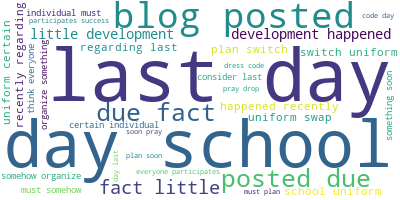

In [86]:
text = list(df.msg_lemmatized.values)
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [88]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [104]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
sent_2=df['msg_lemmatized_without_point'][0]

n = 6
sixgrams = ngrams(sent_2, n)

for grams in sixgrams:
  print (grams)

('This', 'blog', 'posted', 'due', 'fact', 'little')
('blog', 'posted', 'due', 'fact', 'little', 'development')
('posted', 'due', 'fact', 'little', 'development', 'happened')
('due', 'fact', 'little', 'development', 'happened', 'recently')
('fact', 'little', 'development', 'happened', 'recently', 'regarding')
('little', 'development', 'happened', 'recently', 'regarding', 'last')
('development', 'happened', 'recently', 'regarding', 'last', 'day')
('happened', 'recently', 'regarding', 'last', 'day', 'school')
('recently', 'regarding', 'last', 'day', 'school', 'uniform')
('regarding', 'last', 'day', 'school', 'uniform', 'swap')
('last', 'day', 'school', 'uniform', 'swap', 'If')
('day', 'school', 'uniform', 'swap', 'If', 'plan')
('school', 'uniform', 'swap', 'If', 'plan', 'switch')
('uniform', 'swap', 'If', 'plan', 'switch', 'uniform')
('swap', 'If', 'plan', 'switch', 'uniform', 'certain')
('If', 'plan', 'switch', 'uniform', 'certain', 'individual')
('plan', 'switch', 'uniform', 'certain', 

In [108]:
from nltk import ngrams
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,6)

['This blog is being posted due',
 'blog is being posted due to',
 'is being posted due to the',
 'being posted due to the fact',
 'posted due to the fact that',
 'due to the fact that little',
 'to the fact that little development',
 'the fact that little development has',
 'fact that little development has happened',
 'that little development has happened recently',
 'little development has happened recently regarding',
 'development has happened recently regarding the',
 'has happened recently regarding the last',
 'happened recently regarding the last day',
 'recently regarding the last day of',
 'regarding the last day of school',
 'the last day of school uniform',
 'last day of school uniform swap',
 'day of school uniform swap .',
 'of school uniform swap . If',
 'school uniform swap . If we',
 'uniform swap . If we all',
 'swap . If we all plan',
 '. If we all plan to',
 'If we all plan to switch',
 'we all plan to switch uniforms',
 'all plan to switch uniforms with',
 'plan t

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import nltk
from nltk.corpus import stopwords
import re


import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [150]:
all_words_nsw = list(itertools.chain(*df['msg_lemmatized_without_point']))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('last', 58500),
 ('day', 58500),
 ('school', 58500),
 ('uniform', 39000),
 ('plan', 39000),
 ('must', 39000),
 ('soon', 39000),
 ('This', 19500),
 ('blog', 19500),
 ('posted', 19500),
 ('due', 19500),
 ('fact', 19500),
 ('little', 19500),
 ('development', 19500),
 ('happened', 19500)]

In [144]:
len(counts_nsw)

35

In [115]:
clean_tweets_no_urls = pd.DataFrame(counts_nsw,
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

Empty DataFrame
Columns: [words, count]
Index: []

In [129]:
from ast import literal_eval
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(str(data["word_tokenize_without_stopwords"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"] and word not in stopword_list:
                    if word in word_dict_without_stopwords.keys():
                        word_dict_without_stopwords[word] += 1
                    else:
                        word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(str(data["word_tokenize"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"]:
                    if word in word_dict_with_stopwords.keys():
                        word_dict_with_stopwords[word] += 1
                    else:
                        word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [130]:
words_without_stopwords, words_with_stopwords = create_word_dict(df, True, True)

  0%|          | 0/19500 [00:00<?, ?it/s]

UnboundLocalError: local variable 'fig' referenced before assignment

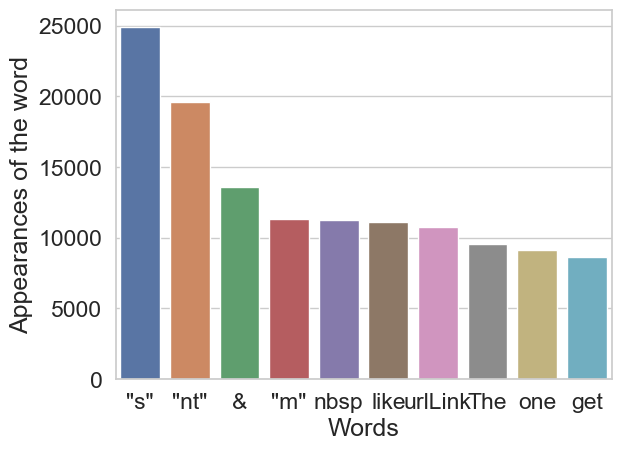

In [133]:
import seaborn as sb
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig(str(save_name + ".jpg"))

    return fig.get_figure()
figure_1 = visualize_specific_words(words_without_stopwords, save_fig=False)

In [134]:
df.msg_lemmatized_without_point.values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [73]:
liste=[]
for topic in  topics:

    text = list(df[df['topic']==topic].msg_lemmatized_without_point.values)
    flat_list = [item for sublist in text for item in sublist]
    liste.append(flat_list)
liste

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school',
  'This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soo

In [29]:
import gensim.corpora as corpora

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [72]:
df['msg_lemmatized_without_point'].values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [92]:
data_words=df.msg_lemmatized_without_point.values.tolist()

In [93]:
data_words=df.msg_lemmatized_without_point.values.tolist()
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2)]


In [80]:
import gensim
from gensim.utils import simple_preprocess

In [99]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"school" + 0.068*"day" + 0.063*"last" + 0.045*"must" + 0.045*"plan" + '
  '0.043*"soon" + 0.043*"uniform" + 0.025*"everyone" + 0.025*"blog" + '
  '0.024*"organize"'),
 (1,
  '0.071*"day" + 0.066*"school" + 0.063*"last" + 0.046*"uniform" + '
  '0.045*"plan" + 0.042*"soon" + 0.038*"must" + 0.028*"little" + '
  '0.028*"everyone" + 0.026*"individual"'),
 (2,
  '0.058*"school" + 0.052*"day" + 0.048*"must" + 0.047*"plan" + '
  '0.041*"uniform" + 0.039*"last" + 0.036*"soon" + 0.030*"regarding" + '
  '0.029*"everyone" + 0.028*"pray"'),
 (3,
  '0.073*"school" + 0.060*"day" + 0.052*"soon" + 0.049*"last" + '
  '0.042*"uniform" + 0.040*"must" + 0.039*"plan" + 0.027*"certain" + '
  '0.026*"blog" + 0.026*"If"'),
 (4,
  '0.075*"last" + 0.065*"day" + 0.058*"school" + 0.047*"plan" + 0.044*"soon" + '
  '0.043*"uniform" + 0.042*"must" + 0.026*"recently" + 0.025*"due" + '
  '0.025*"swap"'),
 (5,
  '0.069*"day" + 0.063*"last" + 0.056*"school" + 0.049*"uniform" + '
  '0.047*"soon" + 0.045*"pla

In [85]:
import pyLDAvis

voirgehen:
- spacy pipeline machen 
- basierend auf nomen oder so die als grundlage für lda nehmen --> sehen wie verteillungen von den organisationen etc sind 


In [47]:
df["msg_lemmatized_without_point"].values

array([list(['This', ' blog', ' posted', ' due', ' fact', ' little', ' development', ' happened', ' recently', ' regarding', ' last', ' day', ' school', ' uniform', ' swap', ' .', ' If', ' plan', ' switch', ' uniform', ' certain', ' individual', ' must', ' somehow', ' organize', ' something', ' soon', ' .', ' Also', ' consider', ' last', ' day', ' school', ' I', ' think', ' everyone', ' participates', ' success', ' .', ' We', ' must', ' plan', ' soon', ' pray', ' drop-the-dress-code-day', ' last', ' day', ' school', ' .']),
       list(['This', ' blog', ' posted', ' due', ' fact', ' little', ' development', ' happened', ' recently', ' regarding', ' last', ' day', ' school', ' uniform', ' swap', ' .', ' If', ' plan', ' switch', ' uniform', ' certain', ' individual', ' must', ' somehow', ' organize', ' something', ' soon', ' .', ' Also', ' consider', ' last', ' day', ' school', ' I', ' think', ' everyone', ' participates', ' success', ' .', ' We', ' must', ' plan', ' soon', ' pray', ' dr

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(df["msg_lemmatized_without_point"])

# Print the topics and their corresponding weights for each set of tokens
for index, row in df.iterrows():
    print("Document #%d" % index)
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([row["tokens_array"][i] for i in topic.argsort()[:-num_topics - 1:-1]])
        print(message)

ValueError: setting an array element with a sequence.

In [51]:
import spacy
dataframe["tokens_sequence"].tolist()

[['apple', 'banana', 'orange'],
 ['dog', 'cat', 'mouse'],
 ['car', 'truck', 'bus']]

In [52]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [62]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(df["msg_lemmatized_without_point"].tolist(), allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])

['blog post fact development happen regard day school plan switch uniform must organize consider day school think participate success must plan pray drop dress code day day school', 'blog post fact development happen regard day school plan switch uniform must organize consider day school think participate success must plan pray drop dress code day day school']


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}'  
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    
)


In [64]:
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [65]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [68]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1,  perp_tol=0.1,
 random_state=100, topic_word_prior=None,
 total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

In [70]:
from pprint import pprint

In [71]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -1818373.5165940826
Perplexity:  36.10876146265444
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [50]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation

# Create example dataframe
data = {
    "tokens_sequence": [
        ["apple", "banana", "orange"],
        ["dog", "cat", "mouse"],
        ["car", "truck", "bus"]
    ]
}
dataframe = pd.DataFrame(data)
data_vectorized = vectorizer.fit_transform(data_lemmatized)
# Define the number of topics
num_topics = 3

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(dataframe["tokens_sequence"].tolist())

# Print the topics and their corresponding weights for each set of tokens
for index, row in dataframe.iterrows():
    print("Document #%d" % index)
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([row["tokens_sequence"][i] for i in topic.argsort()[:-num_topics - 1:-1]])
        print(message)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [101]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.000120 -0.000427       1        1  7.407210
9      0.000364  0.000756       2        1  7.267465
13     0.000696  0.000350       3        1  7.093442
0     -0.000134  0.000152       4        1  7.076867
4      0.000985 -0.000159       5        1  6.865379
6      0.001479  0.000586       6        1  6.796305
16     0.000068 -0.000506       7        1  6.751674
18    -0.000381 -0.000584       8        1  6.503461
1      0.000590  0.000314       9        1  5.939215
17     0.001827 -0.001763      10        1  5.826112
5      0.000521 -0.000469      11        1  5.792374
10     0.000037 -0.000115      12        1  5.493003
15    -0.000118  0.000266      13        1  5.478334
11    -0.000121  0.000303      14        1  5.344792
8      0.000994  0.000247      15        1  4.616286
19     0.000062 -0.001757      16        1  3.584264
3     -0.001733  0.001649      17        1  1.227990
14    -0.001258  0.000660      18        1  0.593110
12     0.000279  0.001688      19        1  0.234021
2     -0.004277 -0.001190      20        1  0.108696, topic_info=       Term          Freq         Total Category  logprob  loglift
26   school  57122.000000  57122.000000  Default  30.0000  30.0000
8       day  58513.000000  58513.000000  Default  29.0000  29.0000
16     last  57242.000000  57242.000000  Default  28.0000  28.0000
18     must  38997.000000  38997.000000  Default  27.0000  27.0000
21     plan  39770.000000  39770.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
34  uniform     39.310481  39285.100845  Topic20  -3.1890  -0.0827
26   school     55.340037  57122.316247  Topic20  -2.8470  -0.1151
8       day     49.402471  58513.542218  Topic20  -2.9605  -0.2526
29     soon     34.509304  38827.835614  Topic20  -3.3192  -0.2013
16     last     36.822361  57242.483340  Topic20  -3.2544  -0.5246

[657 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.079912     Also
0         2  0.069142     Also
0         3  0.080484     Also
0         4  0.077623     Also
0         5  0.069351     Also
...     ...       ...      ...
34       16  0.031895  uniform
34       17  0.011531  uniform
34       18  0.005447  uniform
34       19  0.002495  uniform
34       20  0.000993  uniform

[700 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 14, 1, 5, 7, 17, 19, 2, 18, 6, 11, 16, 12, 9, 20, 4, 15, 13, 3])

In [147]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 MB 4.8 MB/s eta 0:00:0000:0100:03
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_lg: filename=en_core_web_lg-2.3.1-py3-none-any.whl size=782936104 sha256=91cf7ad53fff25d4018b0a9657ce05237761b48c3bdbd828614b83fdee4caf49
  Stored in directory: /Users/niclascramer/Library/Caches/pip/wheels/8b/bb/bb/bdc918f4b37d930a1be9ed876e7b2c2ee518a34803d78a248e
Successfully built en_core_web_lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [11]:
import spacy

nlp_sm = spacy.load("en_core_web_sm")
nlp_lg = spacy.load('en_core_web_lg')

def create_word_counts_by_pos(raw_text, list_of_pos, word_count_dict_input = None):
    """
    takes a raw text file
    tokenizes and lemmatizes it
    limits inspection to list_of_pos types of words
    counts the individual lemmas
    returns a dictionary, keys are pos's in list_of_pos
    values are dictinaries with word counts
    """

    doc = nlp_lg(raw_text)

    if word_count_dict_input is None: 
        word_count_dict = {}
        for part_of_speech in list_of_pos:
            word_count_dict[part_of_speech] = {}
    else:
        word_count_dict = word_count_dict_input

    for token in doc: 
        part_of_speech = token.pos_

        if part_of_speech in list_of_pos and token.is_stop == False:
            word_lemma = token.lemma_
            current_count = word_count_dict[part_of_speech].get(word_lemma, 0)
            current_count += 1
            word_count_dict[part_of_speech][word_lemma] = current_count

    return word_count_dict

def filter_word_count_dict_to_frequent(word_count_dict, threshold):
    """
    Loops through word_count_dict, only keeps items where 
    value is higher than a certain threshold
    """
    frequent_word_count_dict = {}

    list_of_pos = word_count_dict.keys()

    for part_of_speech in list_of_pos:
        frequent_word_count_dict[part_of_speech] = {}
        for key in word_count_dict[part_of_speech]:
            if word_count_dict[part_of_speech][key] > threshold:
                frequent_word_count_dict[part_of_speech][key] = \
                word_count_dict[part_of_speech][key]
                
    return frequent_word_count_dict

def collect_most_frequent_words(word_count_dict, number_to_collect):
    """
    word_count_dict is assumed to be in a format where keys are part-of-speech, 
    values are counts
    number_of_collect: we will collect this amount from each group
    if there is a tie: the one that appeared first
    """

    list_of_pos = word_count_dict.keys()
    most_frequent_words = {}

    for part_of_speech in list_of_pos:
        most_frequent_words[part_of_speech] = \
        sorted(word_count_dict[part_of_speech].items(), \
            key=lambda x: x[1], reverse = True)[:number_to_collect] 
        
    return most_frequent_words

In [148]:
list_of_pos = ['NOUN', 'PROPN', 'ADJ', 'VERB']

In [149]:
df['text'][0]

'This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap. If we all plan to switch uniforms with a certain individual we must somehow organize something soon. Also what do we consider the last day of school I think if everyone participates this will be a success. We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.'

In [151]:
word_count_dict = \
    word_count_func.create_word_counts_by_pos(text, list_of_pos)

NameError: name 'word_count_func' is not defined

In [152]:
df.head()

id            date                                               text  \
0  2970791     25,May,2004  This blog is being posted due to the fact that...   
1  3931851  02,agosto,2004  So I have a big fucking interview tomorrow for...   
2  3481650    07,July,2004  I was reminded just now of the time Ashley and...   
3  4187211  20,August,2004  I was checking up on my cousin Dylan and Fanni...   
4  3686696    24,June,2004  for the NME interview click urlLink part 1 and...   

  lang language_2                                      word_tokenize  \
0   en         en  [This, blog, is, being, posted, due, to, the, ...   
1   en         en  [So, I, have, a, big, fucking, interview, tomo...   
2   en         en  [I, was, reminded, just, now, of, the, time, A...   
3   en         en  [I, was, checking, up, on, my, cousin, Dylan, ...   
4   en         en  [for, the, NME, interview, click, urlLink, par...   

                                       sent_tokenize  count_word  count_sent  \
0  [This blog is being posted due to the fact tha...          83           4   
1  [So I have a big fucking interview tomorrow fo...          88           5   
2  [I was reminded just now of the time Ashley an...         574          32   
3  ["I was checking up on my cousin Dylan and Fan...          84           3   
4  [for the NME interview click urlLink part 1 an...          12           1   

   word_tokenize_num_of_stopwords  ...  \
0                              34  ...   
1                              31  ...   
2                             234  ...   
3                              32  ...   
4                               3  ...   

                                      msg_lemmatized  \
0  [This, blog, posted, due, fact, little, develo...   
1  [So, I, big, fucking, interview, tomorrow, new...   
2  [I, reminded, time, Ashley, I, drove, Kemah, w...   
3  [I, checking, cousin, Dylan, Fannie, "s", wedd...   
4  [NME, interview, click, urlLink, part, 1, urlL...   

                                          cleanLinks laenge_saetze  \
0  This blog is being posted due to the fact that...             4   
1  So I have a big fucking interview tomorrow for...             5   
2  I was reminded just now of the time Ashley and...            32   
3  I was checking up on my cousin Dylan and Fanni...             3   
4  for the NME interview click urlLink part 1 and...             1   

  word_per_sent_mean  gender  age    topic         sign  \
0              20.75    male   14  Student  Sagittarius   
1              17.60    male   15  Student       Pisces   
2              17.94  female   17  Student       Gemini   
3              28.00  female   23  Student       Taurus   
4              12.00  female   23  Student     Aquarius   

                        msg_lemmatized_without_point  \
0  [This, blog, posted, due, fact, little, develo...   
1  [This, blog, posted, due, fact, little, develo...   
2  [This, blog, posted, due, fact, little, develo...   
3  [This, blog, posted, due, fact, little, develo...   
4  [This, blog, posted, due, fact, little, develo...   

                                 msg_lemmatized_port  
0  [thi, blog, post, due, fact, littl, develop, h...  
1  [so, i, big, fuck, interview, tomorrow, new, s...  
2  [i, remind, time, ashley, i, drove, kemah, win...  
3  [i, check, cousin, dylan, fanni, "s", wed, sit...  
4  [nme, interview, click, urllink, part, 1, urll...  

[5 rows x 22 columns]

In [159]:
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,4)

['This blog is being',
 'blog is being posted',
 'is being posted due',
 'being posted due to',
 'posted due to the',
 'due to the fact',
 'to the fact that',
 'the fact that little',
 'fact that little development',
 'that little development has',
 'little development has happened',
 'development has happened recently',
 'has happened recently regarding',
 'happened recently regarding the',
 'recently regarding the last',
 'regarding the last day',
 'the last day of',
 'last day of school',
 'day of school uniform',
 'of school uniform swap',
 'school uniform swap .',
 'uniform swap . If',
 'swap . If we',
 '. If we all',
 'If we all plan',
 'we all plan to',
 'all plan to switch',
 'plan to switch uniforms',
 'to switch uniforms with',
 'switch uniforms with a',
 'uniforms with a certain',
 'with a certain individual',
 'a certain individual we',
 'certain individual we must',
 'individual we must somehow',
 'we must somehow organize',
 'must somehow organize something',
 'somehow or

In [9]:
import random
import string
import nltk
from nltk import ngrams as get_ngrams


start_of_seq_token = "<START>"


class NgramModel(object):
    def __init__(self, n):
        self.n = n

        # dictionary that keeps list of candidate words given context
        self.context = {}
        self.ngram_counter_without_pre = {}

        # keeps track of how many times ngram has appeared in the text before
        self.ngram_counter = {}
        self.unique_count={}
        self.listen_append=[]


    def update(self, sentence: str,liste:list):
        """
        Updates the language model with an additional sentence (string)
        :param sentence: input text
        """
        liste=liste
        n = self.n
        sentence = (n-1) * [start_of_seq_token] + [w for w in nltk.word_tokenize(sentence) if w not in string.punctuation]
        ngrams = get_ngrams(sentence, n)
        for ngram in ngrams:
            #print(ngram)
            prev_words, target_word = ngram[:-1], ngram[-1]
            if (prev_words, target_word) in self.ngram_counter:
                self.ngram_counter[(prev_words, target_word)] += 1.0
            else:
                self.ngram_counter[(prev_words, target_word)] = 1.0


            if target_word in self.unique_count and target_word not in liste:
                liste.append(target_word)
                self.unique_count[target_word] += 1.0
                #print(1)

            elif target_word in self.unique_count and target_word  in liste:
                #print(2)
                pass
                
            else:
                #print(3)
                self.unique_count[target_word] = 1.0

            if target_word in self.ngram_counter_without_pre:
                
                self.ngram_counter_without_pre[target_word] += 1.0
            else:
                self.ngram_counter_without_pre[target_word] = 1.0

            if prev_words in self.context:
                if target_word not in self.context[prev_words]:
                    self.context[prev_words].append(target_word)
                else:
                    pass
            else:
                self.context[prev_words] = [target_word]
        return liste

    # def clac(self, sentence: str, liste:list):
    #     """
    #     Updates the language model with an additional sentence (string)
    #     :param sentence: input text
    #     """
    #     n = self.n
    #     listen_append = self.listen_append
    #     listen_append = liste + listen_append
    #     #print()
    #     sentence = (n-1) * [start_of_seq_token] + [w for w in nltk.word_tokenize(sentence) if w not in string.punctuation]
    #     ngrams = get_ngrams(sentence, n)
    #     #print(ngrams)
    #     #print(listen_append)
    #     for ngram in ngrams:
    #         #print(ngram)
    #         prev_words, target_word = ngram[:-1], ngram[-1]
    #         #print(target_word)
    #         if target_word in self.unique_count and target_word not in listen_append:
    #             listen_append.append(target_word)
    #             self.unique_count[target_word] += 1.0
    #             #print(1)

    #         elif target_word in self.unique_count and target_word  in listen_append:
    #             #print(2)
    #             pass
                
    #         else:
    #             #print(3)
    #             self.unique_count[target_word] = 1.0
    #     #Sprint(listen_append)
    #     return listen_append
        
    def prob(self, context, token):
        """
        Calculates probability of a candidate token to be generated given a context
        :return: conditional probability
        """
        try:
            count_of_token = self.ngram_counter[(context, token)]
            count_of_context = float(len(self.context[context]))
            result = count_of_token / count_of_context

        except KeyError:
            result = 0.0
            
        return result
    
    def random_token(self, context):
        """
        Given a context, selects the next word to append in a sequence
        :param context:
        :return:
        """
        r = random.random() / 50
        map_to_probs = {}
        token_of_interest = self.context[context]
        for token in token_of_interest:
            map_to_probs[token] = self.prob(context, token)

        summ = 0
        for token in sorted(map_to_probs):
            summ += map_to_probs[token]
            if summ > r:
                return token
        
        return next(sorted(map_to_probs))

    def generate_text(self, token_count: int):
        """
        :param token_count: number of words to be produced
        :return: generated text
        """
        n = self.n
        context_queue = (n - 1) * [start_of_seq_token]
        result = []
        for _ in range(token_count):
            obj = self.random_token(tuple(context_queue))
            result.append(obj)
            if n > 1:
                context_queue.pop(0)
                if obj == '.':
                    context_queue = (n - 1) * [start_of_seq_token]
                else:
                    context_queue.append(obj)
        return ' '.join(result)

In [ ]:
import nltk
import unicodedata
import string

all_characters = string.printable
n_characters = len(all_characters)

# Turn a Unicode string to plain ASCII, see https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

with open('tinyshakespeare.txt', 'r', encoding="utf-8") as f:
    texts = unicodeToAscii(f.read())

sentences = [sent for sent in nltk.sent_tokenize(texts) if sent]

In [163]:
import string
all_characters = string.printable
n_characters = len(all_characters)
n_characters

100

In [180]:
df['text'].values.tolist()

['This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap. If we all plan to switch uniforms with a certain individual we must somehow organize something soon. Also what do we consider the last day of school I think if everyone participates this will be a success. We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.',
 "So I have a big fucking interview tomorrow for my new school. I am also scared of talking to people that I don't know including girls. So that's going to put me in a bad spot. And I wonder what questions that they'll ask. It's probably something like: -Why did you apply to IPHS -From your first view what seperates IPHS from any other school -Will you be using the CSU Pomona library often Any help if you can",
 "I was reminded just now of the time Ashley and I drove to Kemah with the windows down and Taking Back Sunday blaring. That was really f

In [298]:
sentences = [sent for sent in nltk.sent_tokenize(df['text'][0]) if sent]
sentences
a=[w for w in nltk.word_tokenize(sentence).unique() if w not in string.punctuation]

['This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap.',
 'If we all plan to switch uniforms with a certain individual we must somehow organize something soon.',
 'Also what do we consider the last day of school I think if everyone participates this will be a success.',
 'We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.']

In [11]:
%%time
model = NgramModel(n=2)
for x in tqdm(range(len(df.index))):
#for x in tqdm(range(3)):  
    sentences = [sent for sent in nltk.sent_tokenize(df['text'][x]) if sent]
    
    liste=[]
    for sent in sentences:
        #num=1
        #print(sent)
        liste=model.update(sent,liste)
        #liste=model.clac(sent,liste)
    #print(liste)

    
print(len(model.unique_count))

  0%|          | 0/19500 [00:00<?, ?it/s]

121338
CPU times: user 58.9 s, sys: 540 ms, total: 59.4 s
Wall time: 59.1 s


In [12]:
print(model.unique_count)

{'This': 2623.0, 'blog': 1537.0, 'is': 11817.0, 'being': 2294.0, 'posted': 313.0, 'due': 384.0, 'to': 15476.0, 'the': 15931.0, 'fact': 961.0, 'that': 11724.0, 'little': 2662.0, 'development': 91.0, 'has': 4445.0, 'happened': 648.0, 'recently': 345.0, 'regarding': 102.0, 'last': 2974.0, 'day': 3600.0, 'of': 13460.0, 'school': 1089.0, 'uniform': 27.0, 'swap': 17.0, 'If': 1870.0, 'we': 5439.0, 'all': 7304.0, 'plan': 435.0, 'switch': 71.0, 'uniforms': 9.0, 'with': 8955.0, 'a': 14476.0, 'certain': 334.0, 'individual': 101.0, 'must': 1094.0, 'somehow': 251.0, 'organize': 28.0, 'something': 2666.0, 'soon': 967.0, 'Also': 449.0, 'what': 5320.0, 'do': 7452.0, 'consider': 202.0, 'I': 13141.0, 'think': 4464.0, 'if': 4955.0, 'everyone': 1324.0, 'participates': 2.0, 'this': 8951.0, 'will': 5144.0, 'be': 8830.0, 'success': 135.0, 'We': 2364.0, 'and': 14383.0, 'pray': 158.0, 'there': 4959.0, 'not': 7503.0, 'drop-the-dress-code-day': 1.0, 'on': 10096.0, 'So': 3017.0, 'have': 9475.0, 'big': 1247.0, 'fu

In [295]:
words_in_texts=pd.DataFrame(model.ngram_counter_without_pre,index=[0]).transpose().reset_index().rename(columns={'index':'word',0:'num'})
words_in_texts.head()

word      num
0    This   3141.0
1    blog   2000.0
2      is  33051.0
3   being   2866.0
4  posted    339.0

In [276]:
words_in_texts.to_csv('data/words_in_text.csv')


In [3]:
words_in_texts=pd.read_csv('data/words_in_text.csv')

words_in_texts=words_in_texts.loc[:, ~words_in_texts.columns.str.contains('^Unnamed')]
words_in_texts.sort_values(by= 'num',ascending=False).head()

word       num
7   the  108773.0
41    I  100310.0
6    to   88167.0
51  and   72508.0
29    a   63895.0

In [4]:
print(model.ngram_counter)

NameError: name 'model' is not defined

In [ ]:
count_overview=pd.DataFrame(model.unique_count,index=[0]).transpose().reset_index().rename(columns={'index':'word',0:'num'})
count_overview.to_csv('data/count_overview.csv')



word      num
7   the  15931.0
6    to  15476.0
29    a  14476.0
51  and  14383.0
18   of  13460.0

In [5]:
count_overview=pd.read_csv('data/count_overview.csv')
count_overview=count_overview.loc[:, ~count_overview.columns.str.contains('^Unnamed')]
count_overview.sort_values(by= 'num',ascending=False).head()


word      num
7   the  15931.0
6    to  15476.0
29    a  14476.0
51  and  14383.0
18   of  13460.0

In [6]:
count_overview.sort_values(by= 'num',ascending=False).head(20)

word      num
7     the  15931.0
6      to  15476.0
29      a  14476.0
51    and  14383.0
18     of  13460.0
41      I  13141.0
79     in  12230.0
146    it  11858.0
2      is  11817.0
9    that  11724.0
63    for  11060.0
64     my  10172.0
56     on  10096.0
75     's   9743.0
58   have   9475.0
28   with   8955.0
46   this   8951.0
48     be   8830.0
93    you   8531.0
130   but   8488.0

In [7]:
count_ordnung=count_overview.sort_values(by= 'num',ascending=False)

In [8]:
count_ordnung[count_ordnung['num']>7000]

word      num
7     the  15931.0
6      to  15476.0
29      a  14476.0
51    and  14383.0
18     of  13460.0
41      I  13141.0
79     in  12230.0
146    it  11858.0
2      is  11817.0
9    that  11724.0
63    for  11060.0
64     my  10172.0
56     on  10096.0
75     's   9743.0
58   have   9475.0
28   with   8955.0
46   this   8951.0
48     be   8830.0
93    you   8531.0
130   but   8488.0
71    n't   8482.0
113   was   8207.0
78     me   8146.0
161    at   7948.0
149    so   7516.0
54    not   7503.0
39     do   7452.0
24    all   7304.0

In [10]:
words_in_texts=words_in_texts.sort_values(by= 'num',ascending=False)

In [11]:
words_in_texts[words_in_texts['num']>7000]

word       num
7      the  108773.0
41       I  100310.0
6       to   88167.0
51     and   72508.0
29       a   63895.0
..     ...       ...
72    know    7559.0
43      if    7316.0
181     by    7199.0
327  would    7052.0
293     an    7024.0

[61 rows x 2 columns]

In [18]:
df.text.tolist()

['This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap. If we all plan to switch uniforms with a certain individual we must somehow organize something soon. Also what do we consider the last day of school I think if everyone participates this will be a success. We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.',
 "So I have a big fucking interview tomorrow for my new school. I am also scared of talking to people that I don't know including girls. So that's going to put me in a bad spot. And I wonder what questions that they'll ask. It's probably something like: -Why did you apply to IPHS -From your first view what seperates IPHS from any other school -Will you be using the CSU Pomona library often Any help if you can",
 "I was reminded just now of the time Ashley and I drove to Kemah with the windows down and Taking Back Sunday blaring. That was really f

In [19]:
text='TEXT LEMMA POS TAG DEP SHAPE ALPHA STOP'
text.lower()

'text lemma pos tag dep shape alpha stop'

In [26]:
import spacy

nlp = spacy.load("en_core_web_sm")
text_list=[]
lemma_list=[]
pos_list=[]
tag_list=[]
dep_list=[]
shape_list=[]
alpha_list=[]
stop_list=[]

for text in tqdm(df.text.tolist()):
    doc = nlp(text)
    text_list_word=[]
    lemma_list_word=[]
    pos_list_word=[]
    tag_list_word=[]
    dep_list_word=[]
    shape_list_word=[]
    alpha_list_word=[]
    stop_list_word=[]
    for token in doc:
        text_list_word.append(token.text)
        lemma_list_word.append(token.lemma_)
        pos_list_word.append(token.pos_)
        tag_list_word.append(token.tag_)
        dep_list_word.append(token.dep_)
        shape_list_word.append(token.shape_)
        alpha_list_word.append(token.is_alpha)
        stop_list_word.append(token.is_stop)
    text_list.append(text_list_word)
    lemma_list.append(lemma_list_word)
    pos_list.append(pos_list_word)
    tag_list.append(tag_list_word)
    dep_list.append(dep_list_word)
    shape_list.append(shape_list_word)
    alpha_list.append(alpha_list_word)
    stop_list.append(stop_list_word)
    #print(text_list)
d = {'text':text,'text_list': text_list, 'lemma_list': lemma_list,'pos_list': pos_list, 'tag_list': tag_list,'dep_list': dep_list, 'shape_list': shape_list,'alpha_list': alpha_list, 'stop_list': stop_list}
df_text_spacy=pd.DataFrame(data=d)
    


100%|██████████| 19500/19500 [08:08<00:00, 39.95it/s]


In [27]:
df_text_spacy.head()

text  \
0  well...i got my hair cut again today rather cu...   
1  well...i got my hair cut again today rather cu...   
2  well...i got my hair cut again today rather cu...   
3  well...i got my hair cut again today rather cu...   
4  well...i got my hair cut again today rather cu...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   
2  [I, was, reminded, just, now, of, the, time, A...   
3  [I, was, checking, up, on, my, cousin, Dylan, ...   
4  [for, the, NME, interview, click, urlLink, par...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   
2  [-PRON-, be, remind, just, now, of, the, time,...   
3  [-PRON-, be, check, up, on, -PRON-, cousin, Dy...   
4  [for, the, NME, interview, click, urllink, par...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   
2  [PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...   
3  [PRON, AUX, VERB, ADP, ADP, DET, NOUN, PROPN, ...   
4  [ADP, DET, PROPN, NOUN, VERB, ADJ, NOUN, NUM, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   
2  [PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...   
3  [PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...   
4  [IN, DT, NNP, NN, VB, JJ, NN, CD, CC, VBP, NN,...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   
2  [nsubjpass, auxpass, ROOT, advmod, advmod, pre...   
3  [nsubj, aux, ROOT, prt, prep, poss, pobj, poss...   
4  [prep, det, compound, nsubj, ROOT, punct, npad...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   
2  [X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...   
3  [X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...   
4  [xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   
2  [True, True, True, True, True, True, True, Tru...   
3  [True, True, True, True, True, True, True, Tru...   
4  [True, True, True, True, True, True, True, Fal...   

                                           stop_list  
0  [True, False, True, True, False, True, True, T...  
1  [True, True, True, True, False, False, False, ...  
2  [True, True, False, True, True, True, True, Fa...  
3  [True, True, False, True, True, True, False, F...  
4  [True, True, False, False, False, False, True,...

In [31]:
from nltk.corpus import stopwords
def stopwords_count_and_removal(data, col, language="english"):

    stoplist = stopwords.words(language)

    number_of_stopwords = []
    text_without_stopwords = []

    col_name_number_of_stopwords = col + "_num_of_stopwords"
    col_name_without_stopwords = col + "_without_stopwords"

    for i in tqdm(range(len(data))):
        no_of_words = 0
        without_stopwords = []
        for word in data[col][i]:
            if word in stoplist:
                no_of_words += 1
            else:
                without_stopwords.append(word)
        
        text_without_stopwords.append(without_stopwords)
        number_of_stopwords.append(no_of_words)

    data[col_name_number_of_stopwords] = number_of_stopwords
    data[col_name_without_stopwords] = text_without_stopwords


    return data

In [33]:
df_text_spacy=stopwords_count_and_removal(df_text_spacy,'lemma_list')

100%|██████████| 19500/19500 [00:04<00:00, 4088.70it/s]


In [72]:
df_text_spacy.head(
)

text  \
0  well...i got my hair cut again today rather cu...   
1  well...i got my hair cut again today rather cu...   
2  well...i got my hair cut again today rather cu...   
3  well...i got my hair cut again today rather cu...   
4  well...i got my hair cut again today rather cu...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   
2  [I, was, reminded, just, now, of, the, time, A...   
3  [I, was, checking, up, on, my, cousin, Dylan, ...   
4  [for, the, NME, interview, click, urlLink, par...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   
2  [-PRON-, be, remind, just, now, of, the, time,...   
3  [-PRON-, be, check, up, on, -PRON-, cousin, Dy...   
4  [for, the, NME, interview, click, urllink, par...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   
2  [PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...   
3  [PRON, AUX, VERB, ADP, ADP, DET, NOUN, PROPN, ...   
4  [ADP, DET, PROPN, NOUN, VERB, ADJ, NOUN, NUM, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   
2  [PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...   
3  [PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...   
4  [IN, DT, NNP, NN, VB, JJ, NN, CD, CC, VBP, NN,...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   
2  [nsubjpass, auxpass, ROOT, advmod, advmod, pre...   
3  [nsubj, aux, ROOT, prt, prep, poss, pobj, poss...   
4  [prep, det, compound, nsubj, ROOT, punct, npad...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   
2  [X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...   
3  [X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...   
4  [xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   
2  [True, True, True, True, True, True, True, Tru...   
3  [True, True, True, True, True, True, True, Tru...   
4  [True, True, True, True, True, True, True, Fal...   

                                           stop_list  \
0  [True, False, True, True, False, True, True, T...   
1  [True, True, True, True, False, False, False, ...   
2  [True, True, False, True, True, True, True, Fa...   
3  [True, True, False, True, True, True, False, F...   
4  [True, True, False, False, False, False, True,...   

   lemma_list_num_of_stopwords  \
0                           34   
1                           32   
2                          222   
3                           29   
4                            3   

                        lemma_list_without_stopwords  
0  [blog, post, due, fact, little, development, h...  
1  [-PRON-, big, fucking, interview, tomorrow, -P...  
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...  
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...  
4  [NME, interview, click, urllink, part, 1, urll...

In [76]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    text_out_list=[]
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
        text_out_list.append([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags])
    return texts_out,text_out_list

In [77]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized,text_out_list = lemmatization(df_text_spacy["lemma_list_without_stopwords"].tolist(), allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])
print(text_out_list[:2])

['fact development happen regard day school uniform swap plan switch uniform must organize consider day school think participate success must plan pray drop dress code day day school', 'interview tomorrow school scare talk people know include girl go put spot question ask apply view use library help']
[['fact', 'development', 'happen', 'regard', 'day', 'school', 'uniform', 'swap', 'plan', 'switch', 'uniform', 'must', 'organize', 'consider', 'day', 'school', 'think', 'participate', 'success', 'must', 'plan', 'pray', 'drop', 'dress', 'code', 'day', 'day', 'school'], ['interview', 'tomorrow', 'school', 'scare', 'talk', 'people', 'know', 'include', 'girl', 'go', 'put', 'spot', 'question', 'ask', 'apply', 'view', 'use', 'library', 'help']]


In [78]:
df_text_spacy['data_lemmatized']=data_lemmatized
df_text_spacy['text_out_list']=text_out_list

In [89]:
data_lemmatized_noun,text_out_list_noun = lemmatization(df_text_spacy["lemma_list_without_stopwords"].tolist(), allowed_postags=['NOUN']) #select noun and verb
df_text_spacy['data_lemmatized_noun']=data_lemmatized_noun
df_text_spacy['text_out_list_noun']=text_out_list_noun

In [90]:
df_text_spacy.head(
)

text  \
0  well...i got my hair cut again today rather cu...   
1  well...i got my hair cut again today rather cu...   
2  well...i got my hair cut again today rather cu...   
3  well...i got my hair cut again today rather cu...   
4  well...i got my hair cut again today rather cu...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   
2  [I, was, reminded, just, now, of, the, time, A...   
3  [I, was, checking, up, on, my, cousin, Dylan, ...   
4  [for, the, NME, interview, click, urlLink, par...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   
2  [-PRON-, be, remind, just, now, of, the, time,...   
3  [-PRON-, be, check, up, on, -PRON-, cousin, Dy...   
4  [for, the, NME, interview, click, urllink, par...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   
2  [PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...   
3  [PRON, AUX, VERB, ADP, ADP, DET, NOUN, PROPN, ...   
4  [ADP, DET, PROPN, NOUN, VERB, ADJ, NOUN, NUM, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   
2  [PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...   
3  [PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...   
4  [IN, DT, NNP, NN, VB, JJ, NN, CD, CC, VBP, NN,...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   
2  [nsubjpass, auxpass, ROOT, advmod, advmod, pre...   
3  [nsubj, aux, ROOT, prt, prep, poss, pobj, poss...   
4  [prep, det, compound, nsubj, ROOT, punct, npad...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   
2  [X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...   
3  [X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...   
4  [xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   
2  [True, True, True, True, True, True, True, Tru...   
3  [True, True, True, True, True, True, True, Tru...   
4  [True, True, True, True, True, True, True, Fal...   

                                           stop_list  \
0  [True, False, True, True, False, True, True, T...   
1  [True, True, True, True, False, False, False, ...   
2  [True, True, False, True, True, True, True, Fa...   
3  [True, True, False, True, True, True, False, F...   
4  [True, True, False, False, False, False, True,...   

   lemma_list_num_of_stopwords  \
0                           34   
1                           32   
2                          222   
3                           29   
4                            3   

                        lemma_list_without_stopwords  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, interview, click, urllink, part, 1, urll...   

                                     data_lemmatized  \
0  fact development happen regard day school unif...   
1  interview tomorrow school scare talk people kn...   
2  remind time drive window take blaring hear mon...   
3  check cousin wedding site marry 31st find -pro...   
4                  interview click part urllink part   

                                       text_out_list  \
0  [fact, development, happen, regard, day, schoo...   
1  [interview, tomorrow,

In [34]:
df_text_spacy.to_csv('data/df_text_spacy.csv')

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def port(liste):
    return [porter_stemmer.stem(x) for x in liste]

tqdm.pandas()
df_text_spacy['word_tokenize_without_stopwords_port']=df_text_spacy['word_tokenize_without_stopwords'].progress_apply(port)

In [91]:
data_words=df_text_spacy.text_out_list_noun.values.tolist()
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 2)]


In [92]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"time" + 0.021*"-pron-" + 0.014*"thing" + 0.014*"day" + '
  '0.013*"people" + 0.007*"work" + 0.007*"night" + 0.006*"week" + 0.006*"way" '
  '+ 0.006*"today"'),
 (1,
  '0.027*"-pron-" + 0.017*"people" + 0.010*"day" + 0.010*"time" + 0.009*"work" '
  '+ 0.008*"night" + 0.008*"way" + 0.008*"thing" + 0.007*"life" + '
  '0.006*"year"'),
 (2,
  '0.021*"-pron-" + 0.017*"thing" + 0.013*"time" + 0.012*"work" + 0.012*"blog" '
  '+ 0.008*"today" + 0.007*"day" + 0.006*"people" + 0.006*"year" + '
  '0.006*"love"'),
 (3,
  '0.023*"time" + 0.020*"work" + 0.017*"-pron-" + 0.012*"thing" + 0.011*"day" '
  '+ 0.009*"people" + 0.008*"friend" + 0.007*"school" + 0.007*"talk" + '
  '0.006*"place"'),
 (4,
  '0.023*"-pron-" + 0.018*"time" + 0.013*"way" + 0.012*"people" + 0.012*"day" '
  '+ 0.010*"year" + 0.008*"work" + 0.008*"today" + 0.008*"thing" + '
  '0.006*"friend"'),
 (5,
  '0.023*"-pron-" + 0.023*"love" + 0.014*"thing" + 0.014*"work" + 0.010*"life" '
  '+ 0.010*"week" + 0.009*"urllink" + 0.

In [93]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/niclascramer/op

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.008589 -0.000293       1        1  14.764553
0      0.006788 -0.007221       2        1  13.628297
7      0.001146 -0.002861       3        1  11.189408
1      0.001519 -0.010208       4        1  10.245577
4      0.020084 -0.022194       5        1  10.002390
8      0.003968 -0.004444       6        1   9.337382
3      0.012284 -0.013874       7        1   9.331844
5     -0.001313  0.014087       8        1   9.323904
9      0.010010  0.050458       9        1   6.693438
2     -0.063074 -0.003449      10        1   5.483207, topic_info=       Term          Freq         Total Category  logprob  loglift
193    love   3360.000000   3360.000000  Default  30.0000  30.0000
272    blog   1712.000000   1712.000000  Default  29.0000  29.0000
89     work   5411.000000   5411.000000  Default  28.0000  28.0000
22   -pron-  11198.000000  11198.000000  Default  27.0000  27.0000
1       day   6584.000000   6584.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
270     way    110.757235   3609.764198  Topic10  -5.5793  -0.5806
59      lot     88.071735   1981.055069  Topic10  -5.8085  -0.2098
188     guy     85.208747   1791.284265  Topic10  -5.8416  -0.1421
55      job     82.914112   1504.808143  Topic10  -5.8689   0.0049
161    life     84.138593   3693.482888  Topic10  -5.8542  -0.8784

[820 rows x 6 columns], token_table=       Topic      Freq Term
term                       
747        1  0.105092    -
747        2  0.131365    -
747        3  0.108183    -
747        4  0.085001    -
747        5  0.075728    -
...      ...       ...  ...
26194      2  0.152407    ¦
26194      3  0.609626    ¦
26194      8  0.076203    ¦
13870      3  0.797814    •
13870      8  0.132969    •

[2420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 8, 2, 5, 9, 4, 6, 10, 3])